# Automatic Differentiation with ``` TORCH.AUTOGRAD ```
When training neural networks, we perform BackPropogation, which adjusts weights according to the gradient of the loss function with respect to the given parameters

PyTorch uses torch.autograd, which helps in automatic computation of gradient for any graph

In [ ]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad= True)
b = torch.randn(3, requires_grad= True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

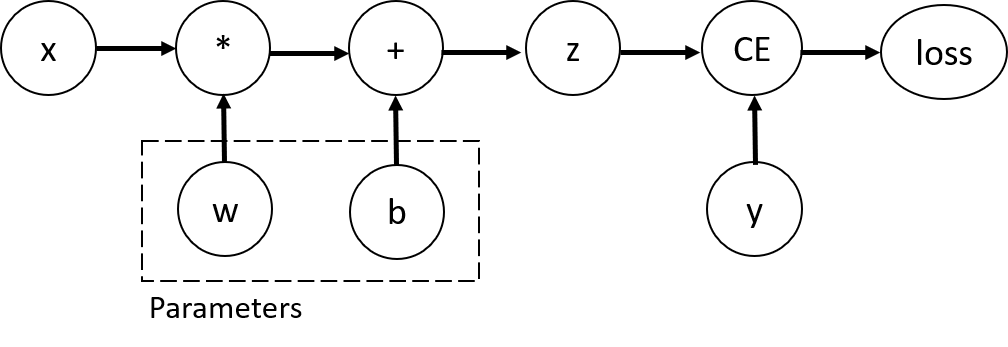

### Tensors, Functions and Computational graph

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7fbf93d62ce0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fbf93d62fb0>


### Computing Gradients

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2938, 0.2871, 0.3187],
        [0.2938, 0.2871, 0.3187],
        [0.2938, 0.2871, 0.3187],
        [0.2938, 0.2871, 0.3187],
        [0.2938, 0.2871, 0.3187]])
tensor([0.2938, 0.2871, 0.3187])


### Disabling Gradient Tracking

In [ ]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x, w) + b

print(z.requires_grad)

True
False


Another way to achieve the same result

In [ ]:
z = torch.matmul(x, w) + b
z_det = z.detach()

print(z_det.requires_grad)

False


### More on Computational Graphs



### Tensor Gradients and Jacobian Products

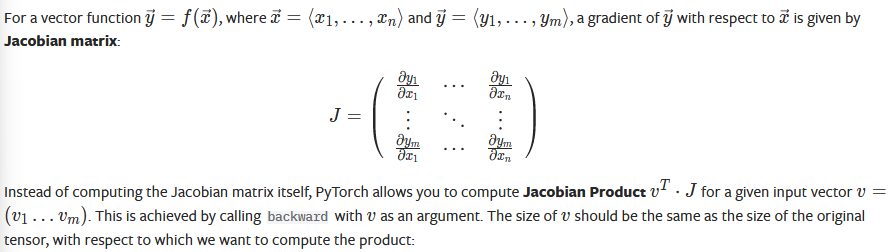

In [ ]:
inp = torch.eye(4, 5, requires_grad= True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph= True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph= True)
print(f"Second call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph= True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])
Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])
